In [1]:
##import required packages
from sklearn.manifold import TSNE
import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



import warnings
warnings.simplefilter(action='ignore')


In [114]:

c4=pd.read_csv("../data/4_cluster(non_normalized data).csv").drop("Unnamed: 0",axis=1).dropna()


# Clusters = 4


The number of entries per class are:
1    1620
0    1133
3     278
2      69
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


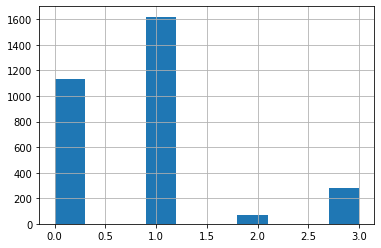

In [3]:
print("The number of entries per class are:\n{}".format(c4['class'].value_counts()),c4['class'].hist())

In [4]:
X1=c4.drop(columns=["class"],axis=1)
y1=c4['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c4[X1.columns[(selector.get_support())]]
c4_top_features=X_red.columns.to_list()

print("Top features are\n")
for val in c4_top_features:
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
Chlamydia Rate
Average Daily PM2.5
% Long Commute - Drives Alone
Life Expectancy
Child Mortality Rate
Drug Overdose Mortality Rate
% Uninsured
% American Indian & Alaska Native


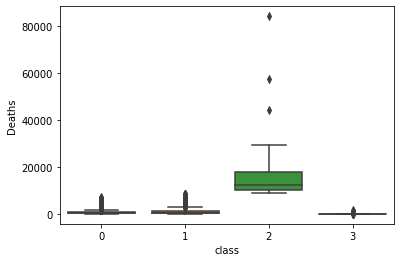

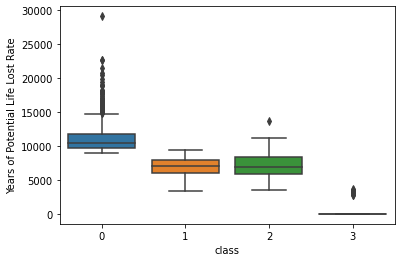

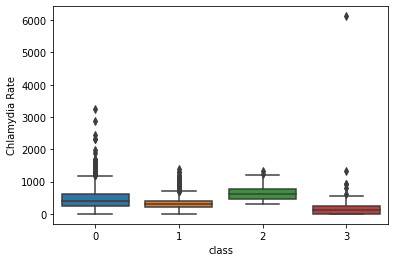

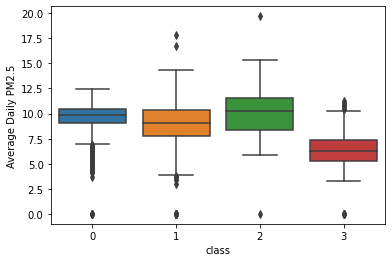

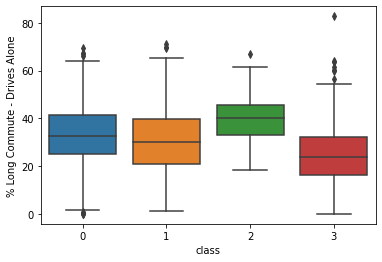

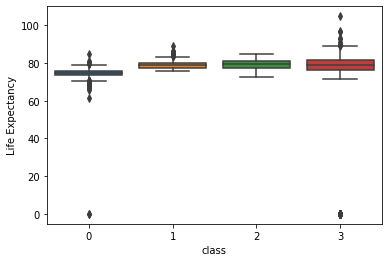

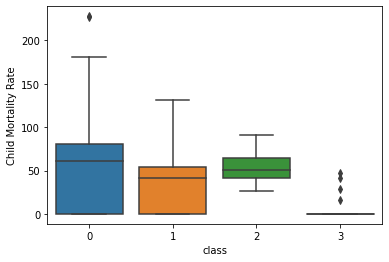

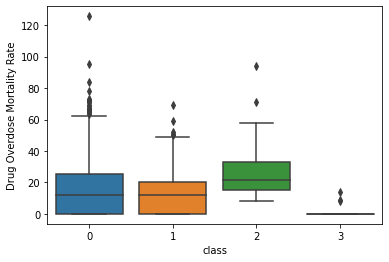

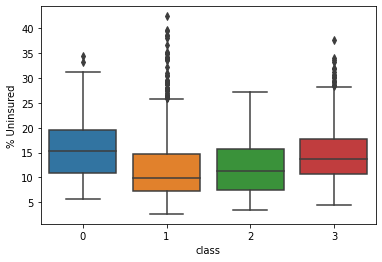

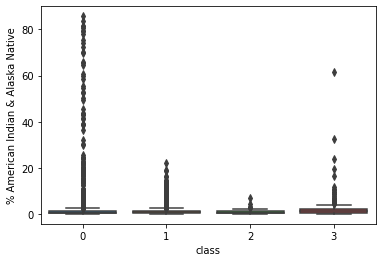

In [5]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

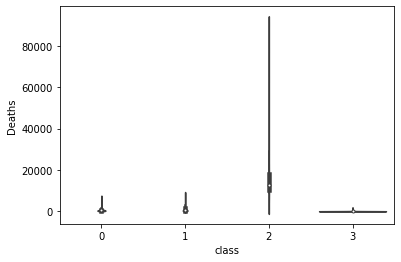

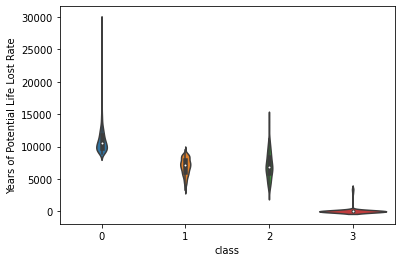

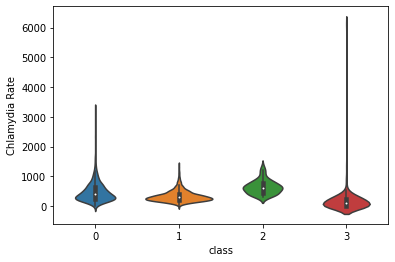

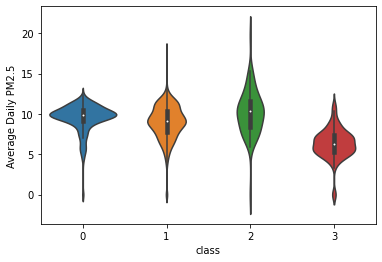

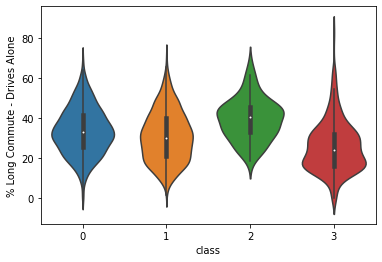

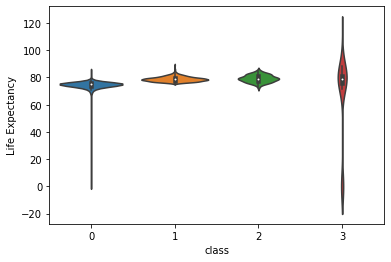

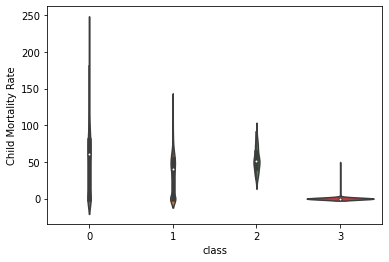

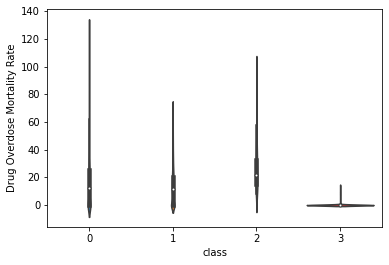

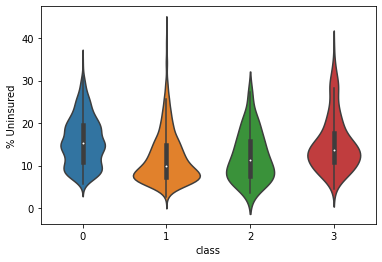

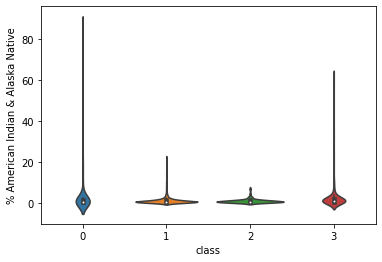

In [6]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1133
0    1133
Name: class, dtype: int64
Top features are

Deaths
% less than 18 years of age
% Disconnected Youth
Drug Overdose Mortality Rate
Life Expectancy
Average Daily PM2.5
Violent Crime Rate
Child Mortality Rate
Years of Potential Life Lost Rate
High School Graduation Rate


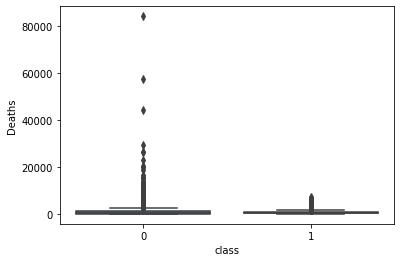

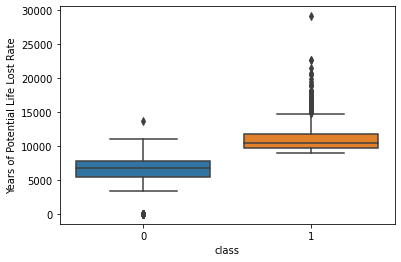

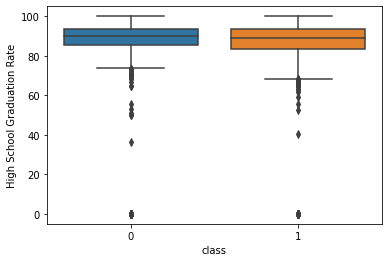

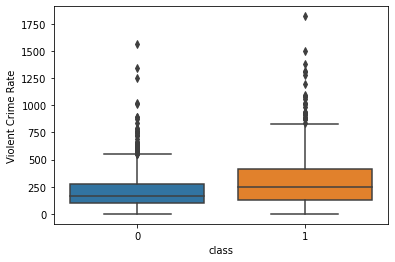

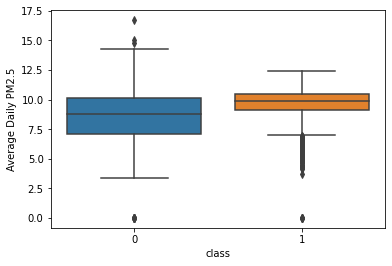

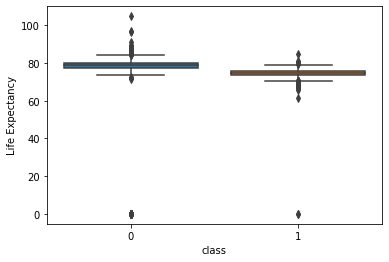

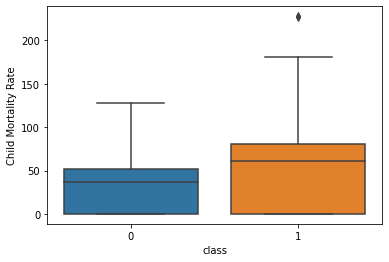

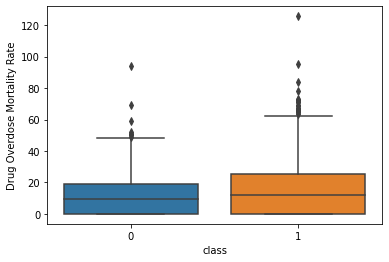

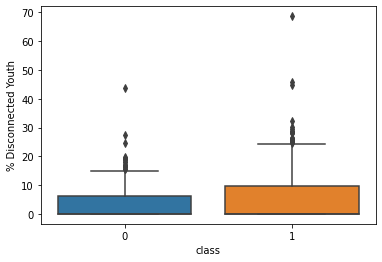

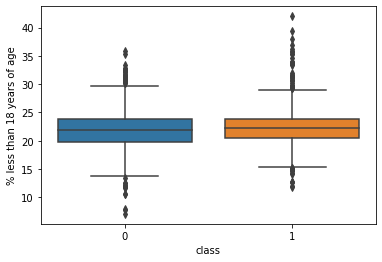

In [7]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c41=pd.concat([data1,d],ignore_index=True)
print(c41['class'].value_counts())



X=c41.drop(['class'],axis=1)
y=c41['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]

c4_1_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_1_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1620
0    1480
Name: class, dtype: int64
Top features are

Deaths
% Asian
Drug Overdose Mortality Rate
HIV Prevalence Rate
Life Expectancy
% Long Commute - Drives Alone
Child Mortality Rate
Years of Potential Life Lost Rate
Chlamydia Rate
% Driving Deaths with Alcohol Involvement


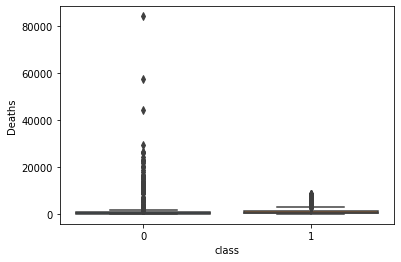

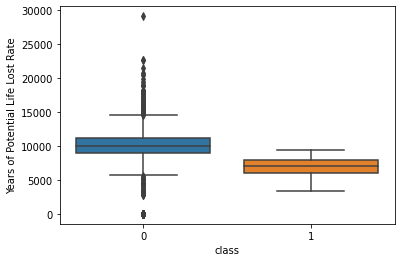

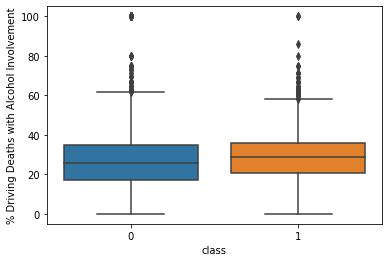

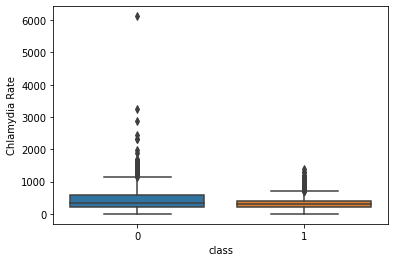

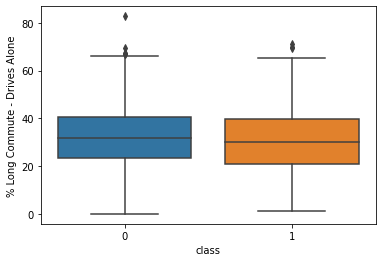

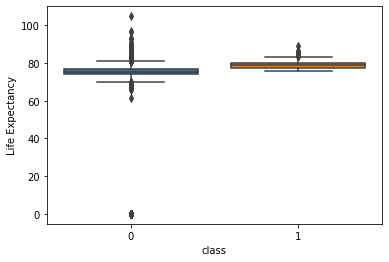

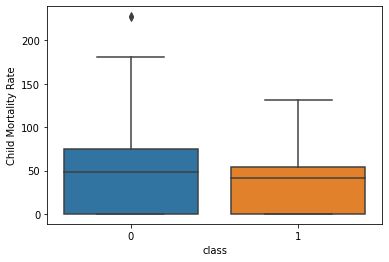

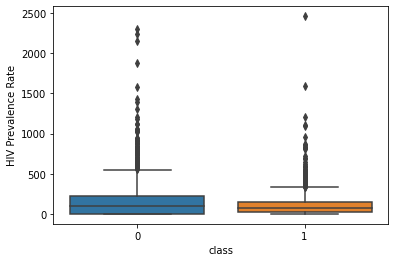

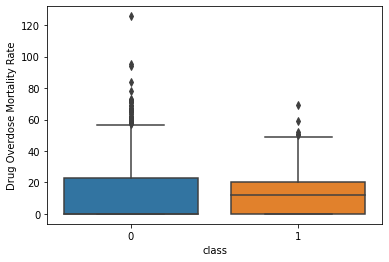

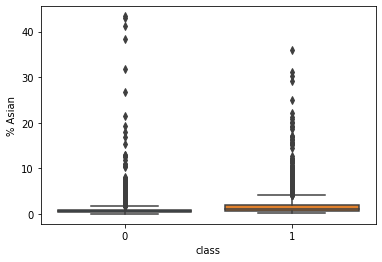

In [8]:
data1=c4[c4['class']==1]
data1_bar=c4[c4['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c42=pd.concat([data1,d],ignore_index=True)
print(c42['class'].value_counts())


X=c42.drop(['class'],axis=1)
y=c42['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
c4_2_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_2_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    69
0    69
Name: class, dtype: int64
Top features are

Deaths
% Female
% Hispanic
% Native Hawaiian/Other Pacific Islander
% Asian
% American Indian & Alaska Native
% less than 18 years of age
internet_ratio
Hypertension Death Rate
High School Graduation Rate


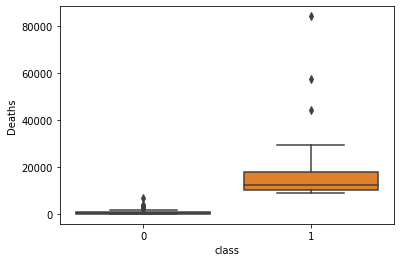

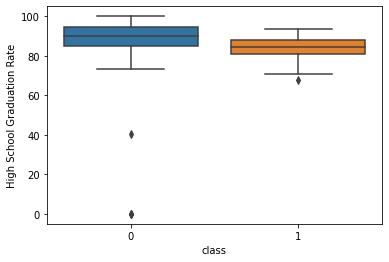

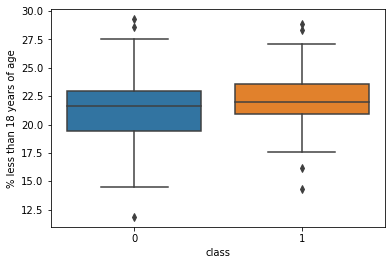

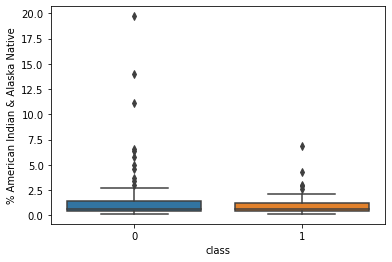

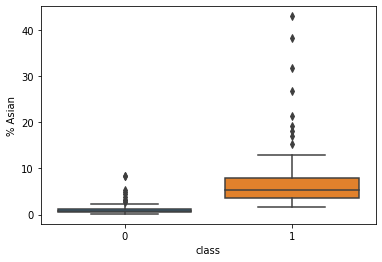

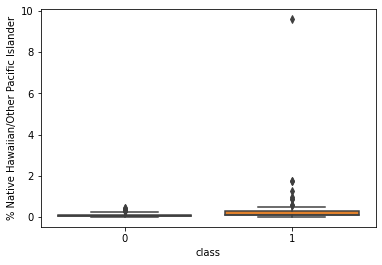

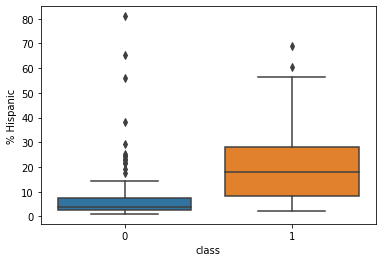

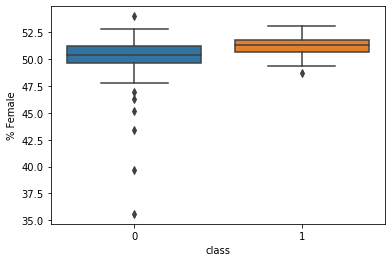

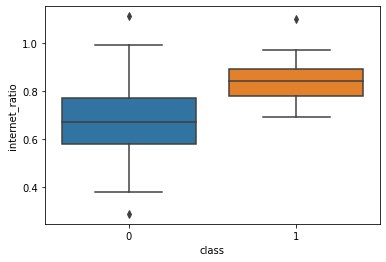

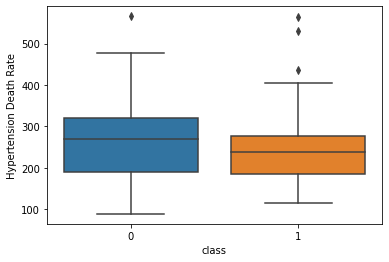

In [9]:
data1=c4[c4['class']==2]
data1_bar=c4[c4['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c43=pd.concat([data1,d],ignore_index=True)
print(c43['class'].value_counts())

X=c43.drop(['class'],axis=1)
y=c43['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
c4_3_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    278
0    278
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% Asian
% Driving Deaths with Alcohol Involvement
Chlamydia Rate
Black/White Segregation Index
% Uninsured
internet_ratio
% Severe Housing Problems
Average Daily PM2.5


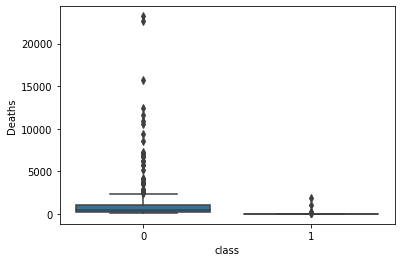

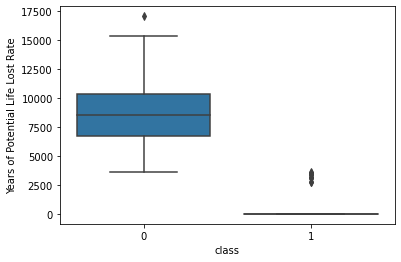

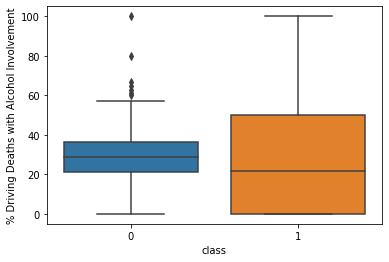

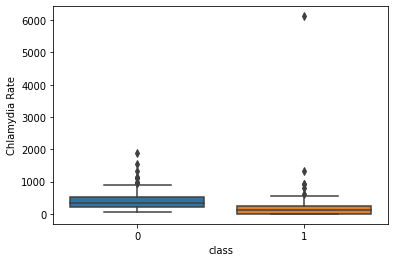

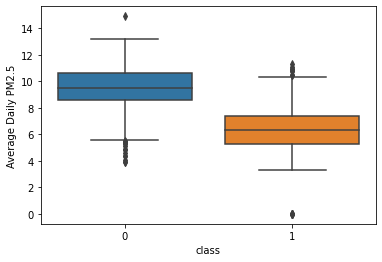

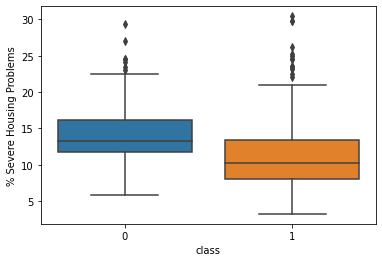

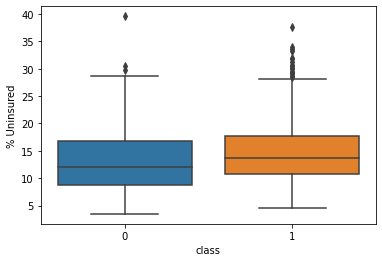

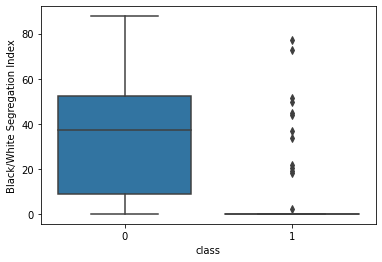

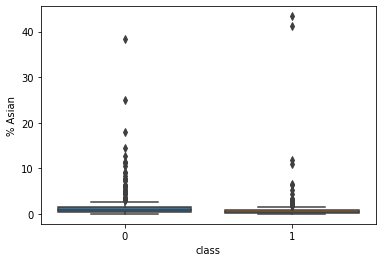

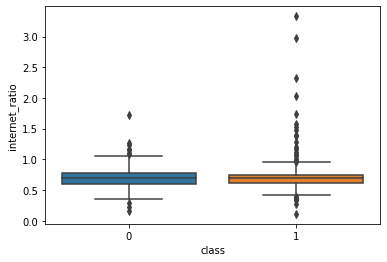

In [10]:
data1=c4[c4['class']==3]
data1_bar=c4[c4['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c44=pd.concat([data1,d],ignore_index=True)
print(c44['class'].value_counts())

X=c44.drop(['class'],axis=1)
y=c44['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
c4_4_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_4_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## Grouping the features together

In [98]:
Feature_data=pd.DataFrame(columns=['all','c41','c42','c43','c44'])

In [148]:
# Top 10 features making contributing towards n=4 clusters case
Feature_data['all']=(c4_top_features) 

# Top 10 features making contributing towards 1st cluster 
Feature_data['c41']=c4_1_top_features 

# Top 10 features making contributing towards 2nd cluster 
Feature_data['c42']=c4_2_top_features 

# Top 10 features making contributing towards 3rd cluster
Feature_data['c43']=c4_3_top_features 


# Top 10 features making contributing towards 4th cluster 
Feature_data['c44']=c4_4_top_features 


In [100]:
Feature_data

,all,c41,c42,c43,c44
0,Deaths,Deaths,Deaths,Deaths,Deaths
1,Years of Potential Life Lost Rate,% less than 18 years of age,% Asian,% Female,Years of Potential Life Lost Rate
2,Chlamydia Rate,% Disconnected Youth,Drug Overdose Mortality Rate,% Hispanic,% Asian
3,Average Daily PM2.5,Drug Overdose Mortality Rate,HIV Prevalence Rate,% Native Hawaiian/Other Pacific Islander,% Driving Deaths with Alcohol Involvement
4,% Long Commute - Drives Alone,Life Expectancy,Life Expectancy,% Asian,Chlamydia Rate
5,Life Expectancy,Average Daily PM2.5,% Long Commute - Drives Alone,% American Indian & Alaska Native,Black/White Segregation Index
6,Child Mortality Rate,Violent Crime Rate,Child Mortality Rate,% less than 18 years of age,% Uninsured
7,Drug Overdose Mortality Rate,Child Mortality Rate,Years of Potential Life Lost Rate,internet_ratio,internet_ratio
8,% Uninsured,Years of Potential Life Lost Rate,Chlamydia Rate,Hypertension Death Rate,% Severe Housing Problems
9,% American Indian & Alaska Native,High School Graduation Rate,% Driving Deaths with Alcohol Involvement,High School Graduation Rate,Average Daily PM2.5


In [101]:
df = Feature_data.apply(lambda x: x.sort_values().values)

In [102]:
df

,all,c41,c42,c43,c44
0,% American Indian & Alaska Native,% Disconnected Youth,% Asian,% American Indian & Alaska Native,% Asian
1,% Long Commute - Drives Alone,% less than 18 years of age,% Driving Deaths with Alcohol Involvement,% Asian,% Driving Deaths with Alcohol Involvement
2,% Uninsured,Average Daily PM2.5,% Long Commute - Drives Alone,% Female,% Severe Housing Problems
3,Average Daily PM2.5,Child Mortality Rate,Child Mortality Rate,% Hispanic,% Uninsured
4,Child Mortality Rate,Deaths,Chlamydia Rate,% Native Hawaiian/Other Pacific Islander,Average Daily PM2.5
5,Chlamydia Rate,Drug Overdose Mortality Rate,Deaths,% less than 18 years of age,Black/White Segregation Index
6,Deaths,High School Graduation Rate,Drug Overdose Mortality Rate,Deaths,Chlamydia Rate
7,Drug Overdose Mortality Rate,Life Expectancy,HIV Prevalence Rate,High School Graduation Rate,Deaths
8,Life Expectancy,Violent Crime Rate,Life Expectancy,Hypertension Death Rate,Years of Potential Life Lost Rate
9,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate,internet_ratio,internet_ratio


In [103]:
columns=df['all'].tolist()
# columns.append('class')


### Data distribution for most important features for n_cluster=4

In [115]:
from sklearn.preprocessing import quantile_transform as qt

X_all=c4.drop('class',axis=1)
X_norm1=qt(c4[columns], n_quantiles=5, random_state=13, copy=False)
X_norm2=qt(X_all, n_quantiles=5, random_state=13, copy=False)
new_df[columns] = X_norm1

X_all=X_norm2

In [117]:

X_new=new_df.copy()

In [118]:
X_new['class']=c4['class']

## Facetgrids with clusterwise data distribution for top 10 features

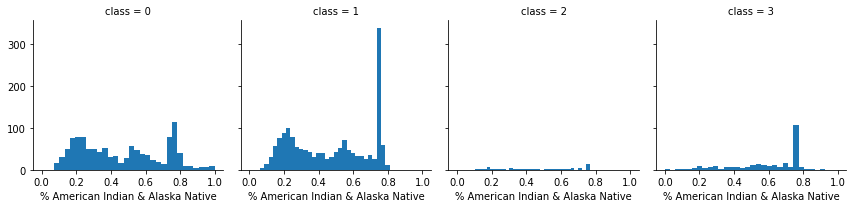

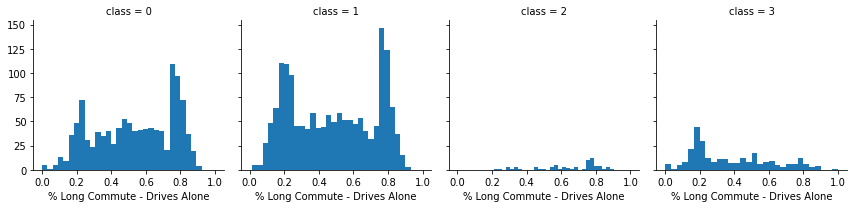

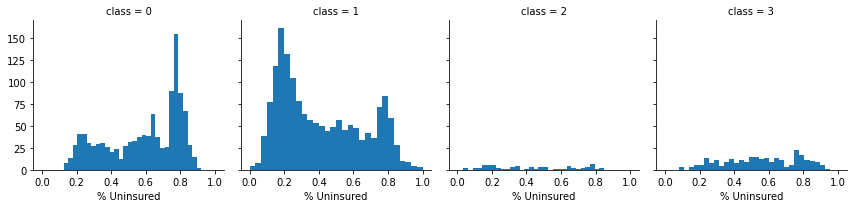

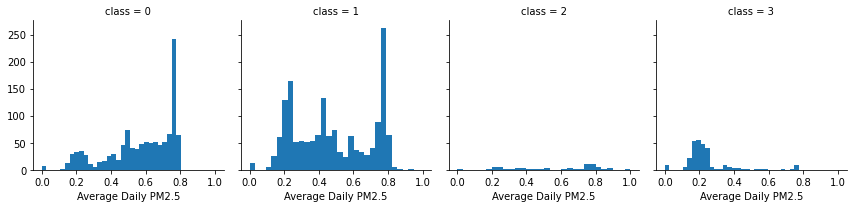

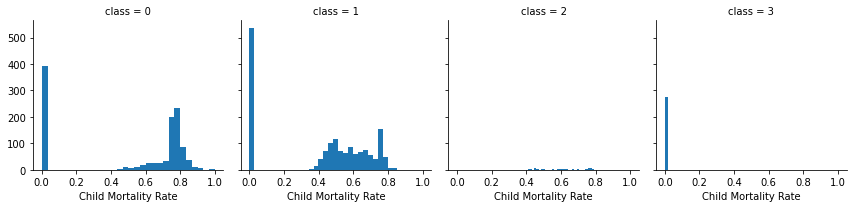

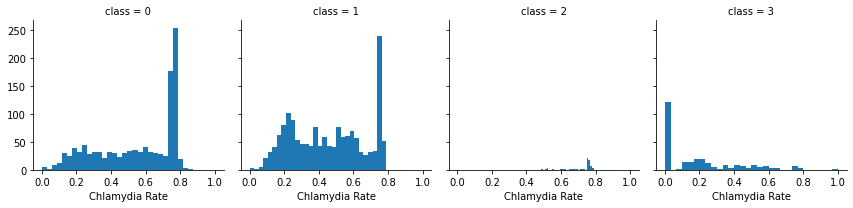

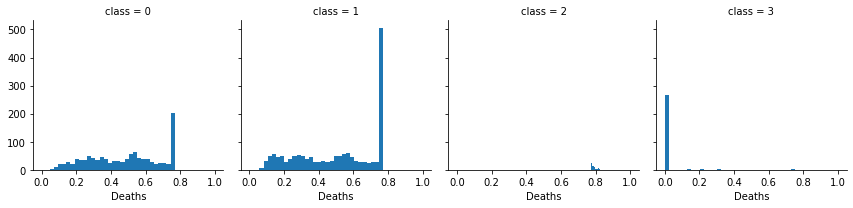

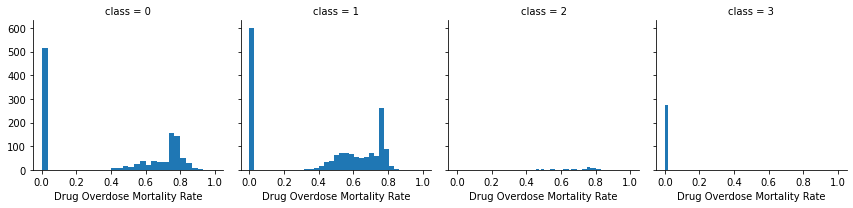

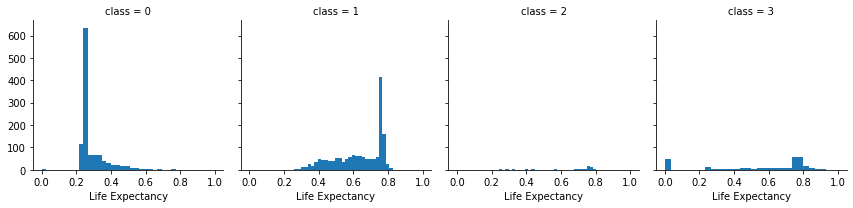

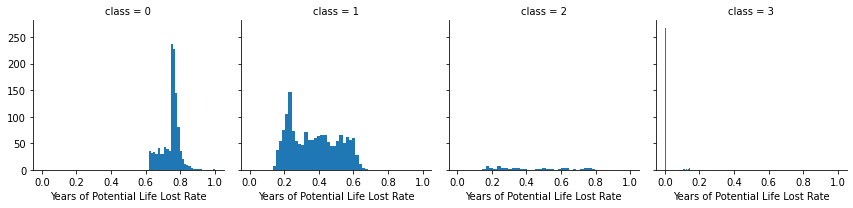

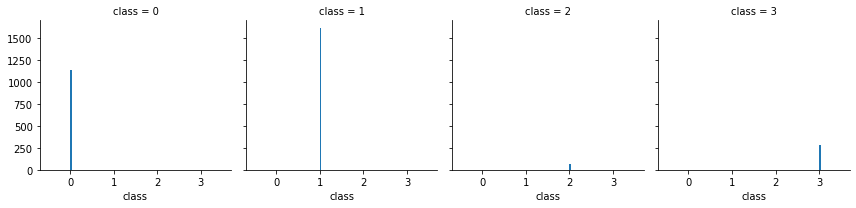

In [119]:
#https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca

for features in X_new:
    grid= sns.FacetGrid(X_new, col='class')
    grid.map(plt.hist, features,bins=30)
    

In [120]:
columns

['% American Indian & Alaska Native',
 '% Long Commute - Drives Alone',
 '% Uninsured',
 'Average Daily PM2.5',
 'Child Mortality Rate',
 'Chlamydia Rate',
 'Deaths',
 'Drug Overdose Mortality Rate',
 'Life Expectancy',
 'Years of Potential Life Lost Rate']

In [121]:
X_new=c4[columns]

In [122]:
# X_filtered=X_new
# X_fileterd['class']=c4['class']

In [123]:
# X_filtered_norm = X_filtered.copy()
# d = {}
# for col in X_filtered_norm:
#     d.update({col : sorted(X_filtered_norm[col])})
# sorted_X_filtered_norm = pd.DataFrame(d)
# rank = sorted_X_filtered_norm.mean(axis = 1).tolist()
# for col in X_filtered_norm:
#     t = np.searchsorted(np.sort(X_filtered_norm[col]), X_filtered_norm[col])
#     X_filtered_norm[col] = [rank[i] for i in t]


In [124]:
# X_filtered_norm.boxplot(grid=True, rot=45,figsize=(20,14))

In [125]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_new)
# df_normalized = pd.DataFrame(x_scaled,columns=columns)

In [126]:
new_df['class']=c4['class']

## Boxplots for all the top 10 important features grouped by respective cluster labels

<AxesSubplot:xlabel='class', ylabel='value'>

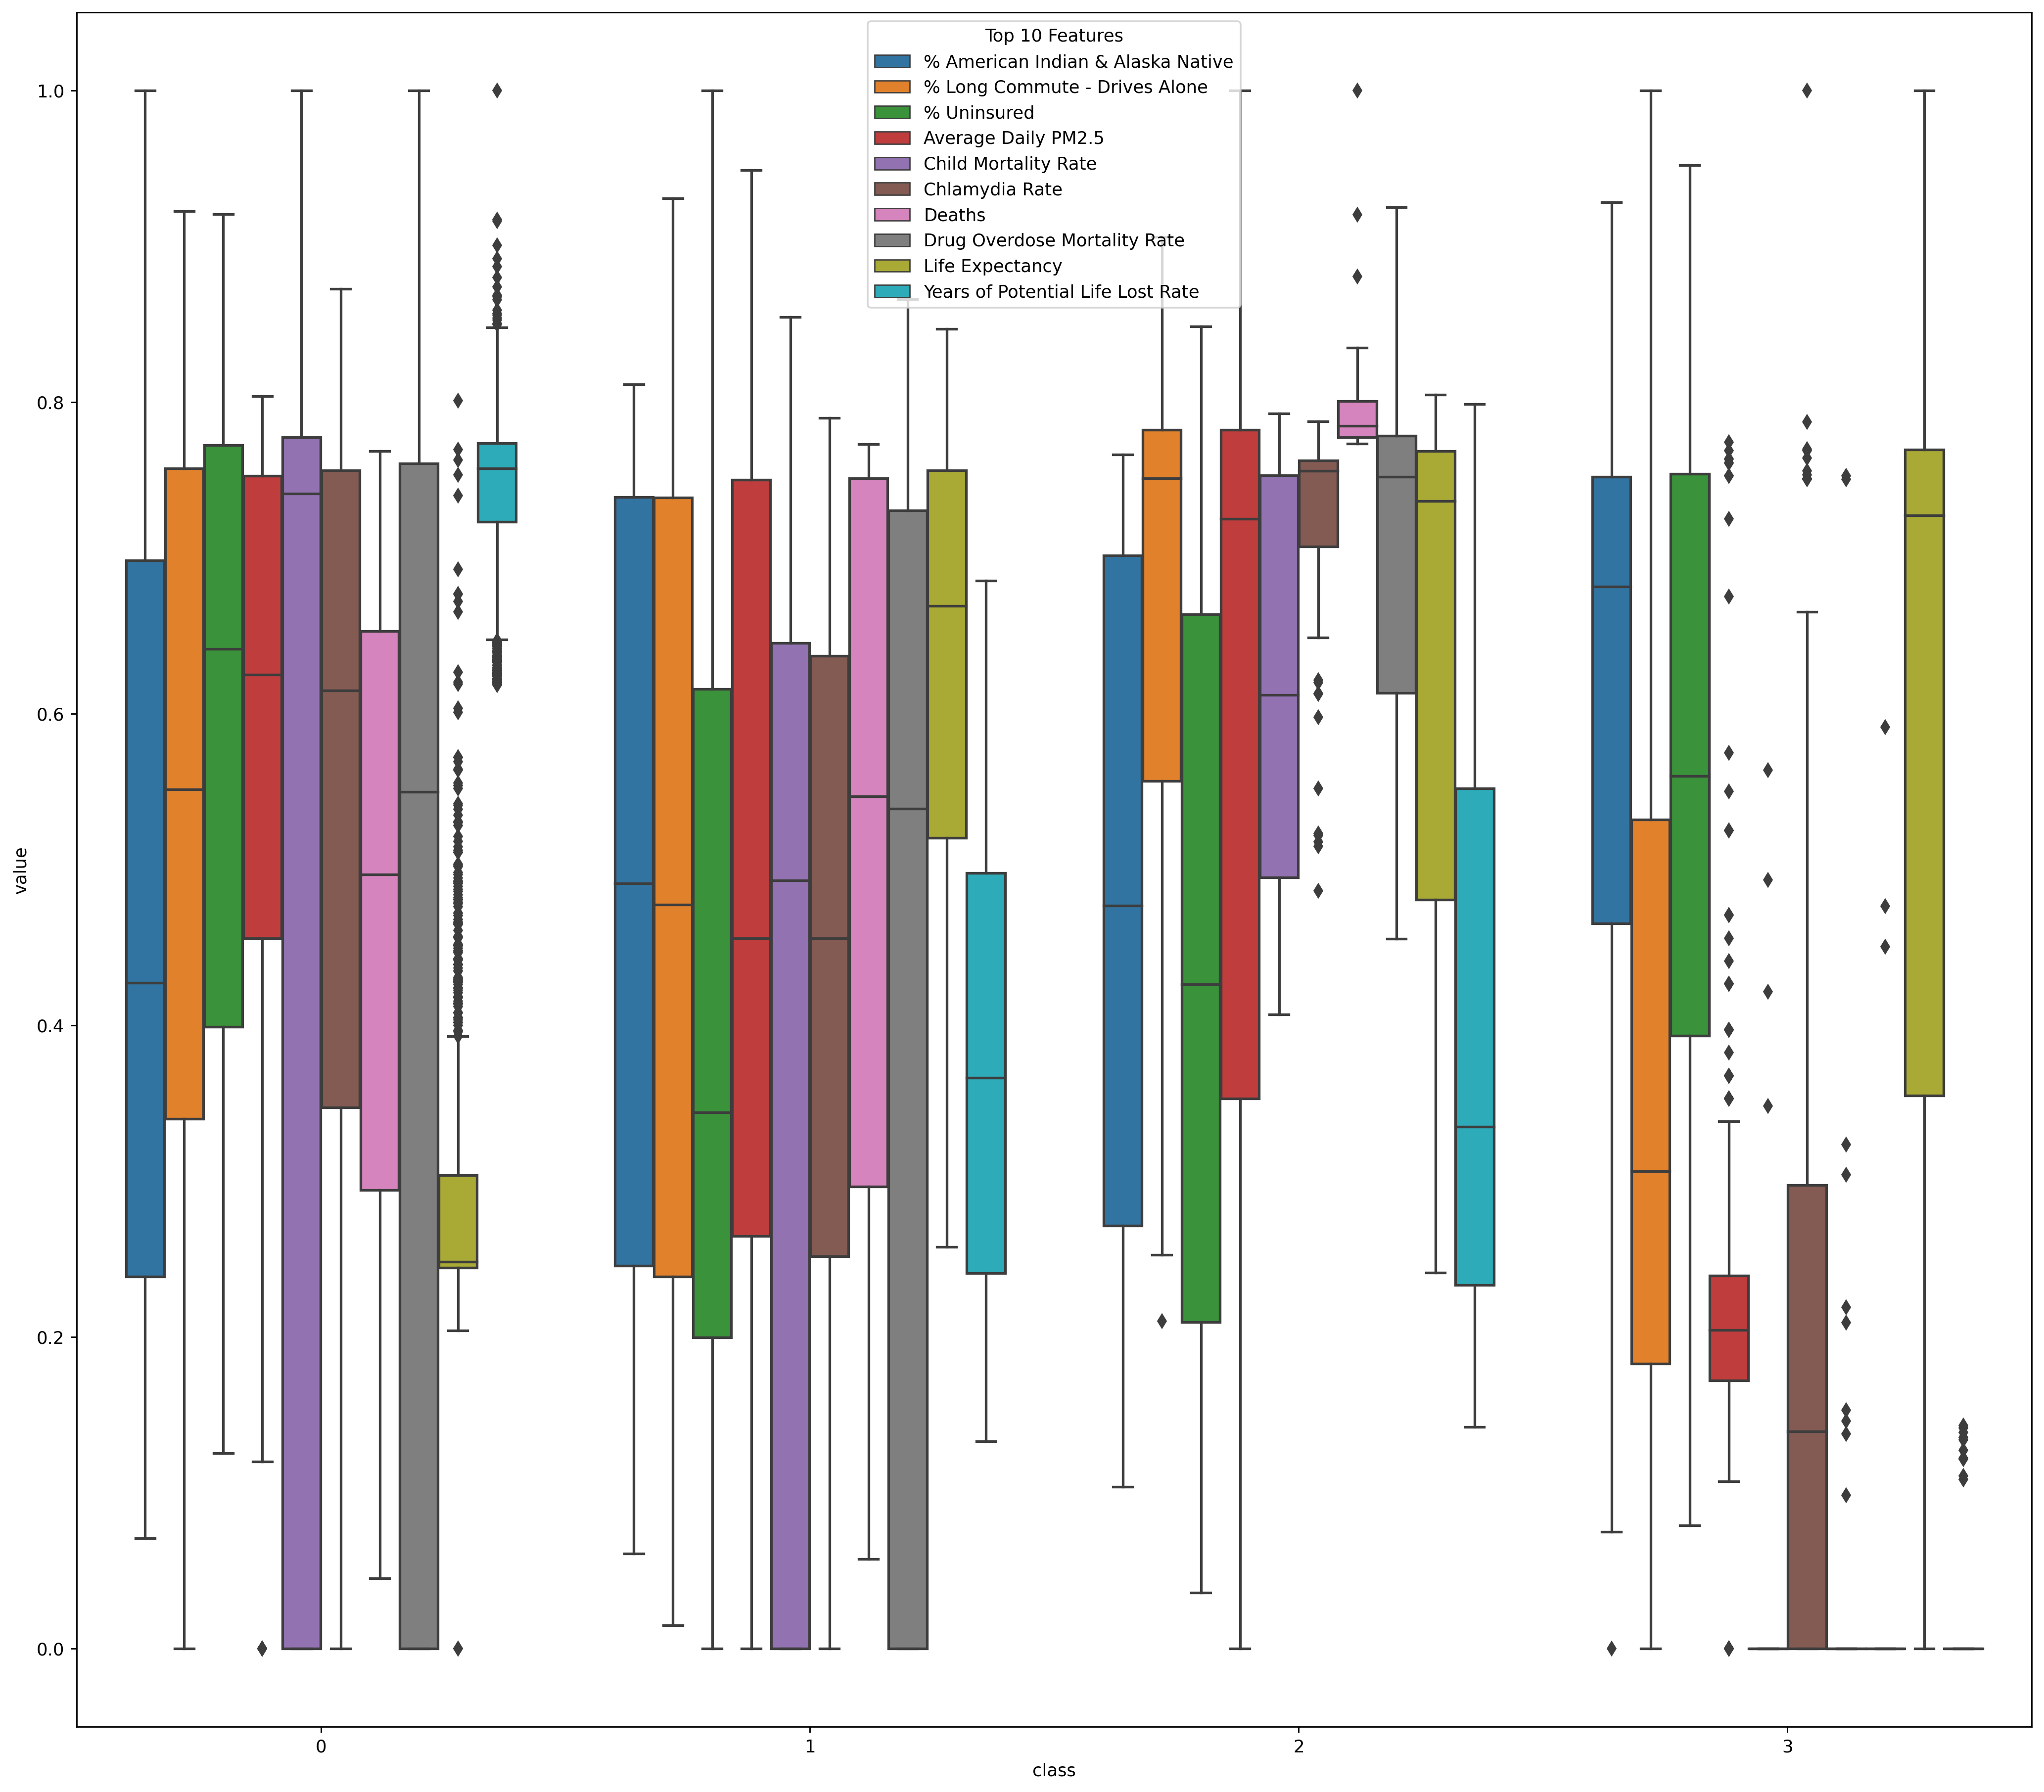

In [127]:
import seaborn as sns
plt.figure(frameon=False,figsize=(20,18),dpi=255)
dd=pd.melt(new_df,id_vars=['class'],value_vars=columns,var_name='Top 10 Features')
sns.boxplot(x='class',y='value',data=dd,hue='Top 10 Features',)
# plt.savefig('feature_boxplot_for_ncluster=4.png')

In [128]:
X_new=new_df.drop('class',axis=1)
labels=c4['class']

In [139]:
dist = 1 - cosine_similarity(X_norm1)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(3100, 2)

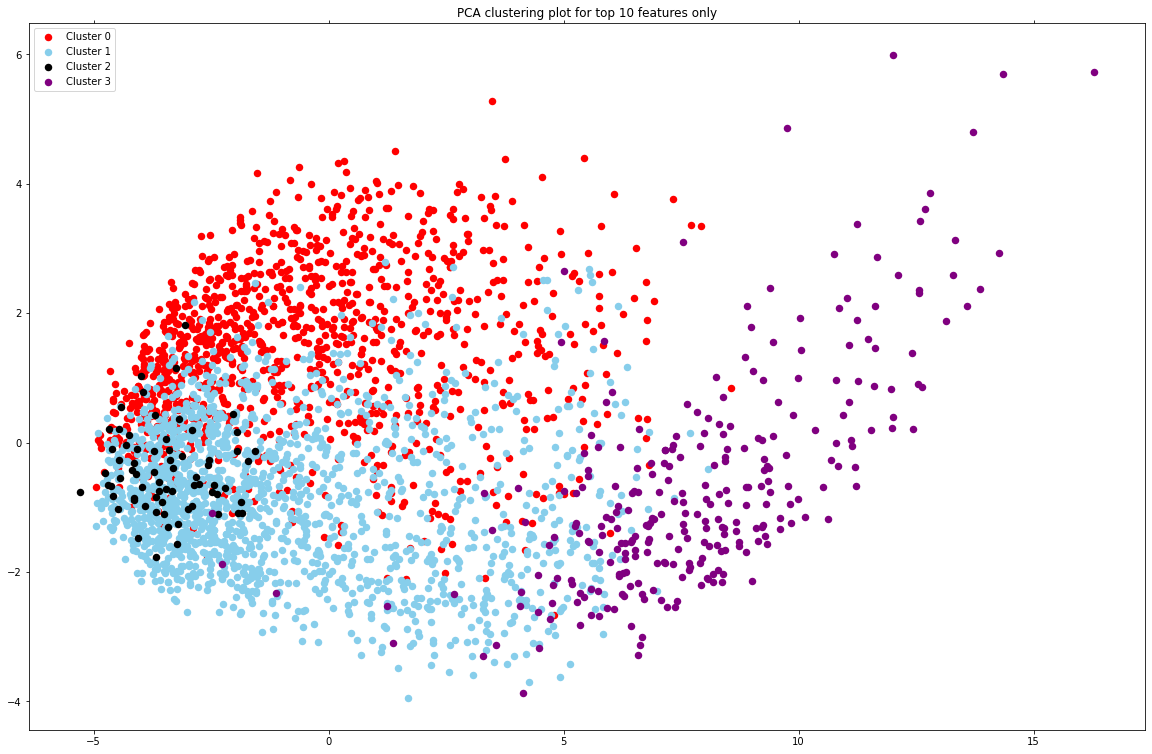

In [146]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'skyblue',
          2: 'black', 
          3: 'purple', 
         }

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
plt.title("PCA clustering plot for top 10 features only")
plt.show()